# Natural Language Processing Project

In this NLP project I will be attempting to classify Yelp Reviews into 1 star or 5 star categories based off the text content in the reviews. 

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords
import string
from sklearn.tree import DecisionTreeClassifier

## The Data

**Read the yelp.csv file and set it as a dataframe called yelp.**

In [118]:
yelp= pd.read_csv('yelp.csv')

** Check the head, info , and describe methods on yelp.**

In [119]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [120]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.3+ KB


In [121]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [122]:
yelp['text length']=yelp['text'].apply(len)

In [123]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


# EDA

Let's explore the data


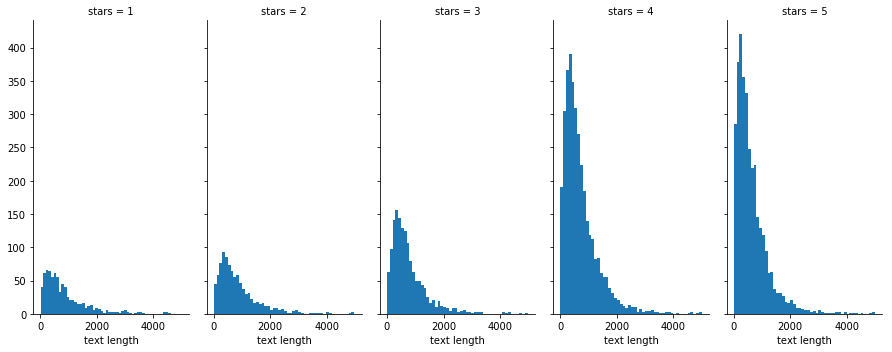

In [124]:
g = sns.FacetGrid(yelp, col='stars', size=5, aspect=.5)

g = g.map(plt.hist, 'text length', bins=50)

Text(0,0.5,'Text Length')

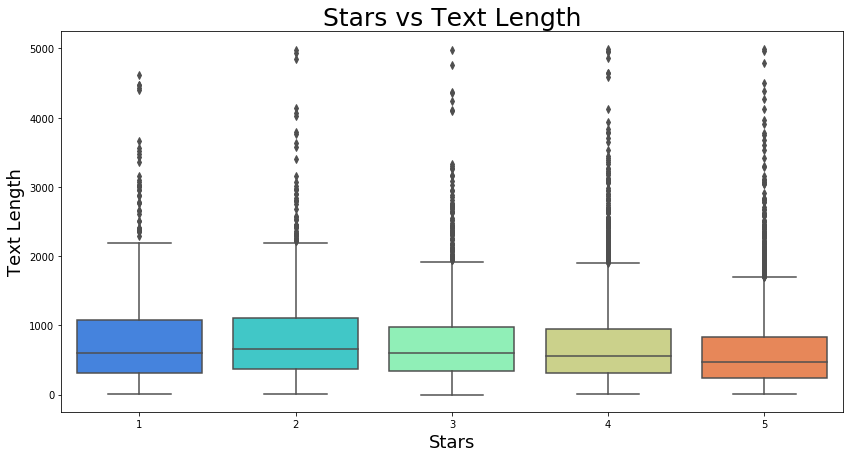

In [125]:
fig=plt.figure(figsize=(14,7))
ax=sns.boxplot(x='stars', y='text length', data=yelp, palette='rainbow')
plt.title('Stars vs Text Length', fontsize=25)
plt.xlabel('Stars', fontsize=18)
plt.ylabel('Text Length',fontsize=18)

In [126]:
# 1 or 2 stars may have more texts, but there are many outliers.

KeyError: 'f'

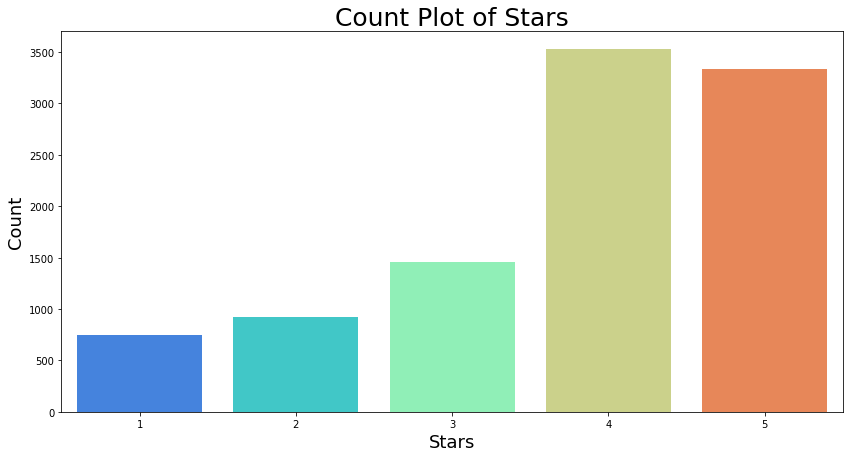

In [167]:
fig=plt.figure(figsize=(14,7))
ax=sns.countplot(x='stars', data=yelp, palette='rainbow')
plt.title('Count Plot of Stars', fontsize=25)
plt.xlabel('Stars', fontsize=18)
plt.ylabel('Count',fontsize=18)
for p in ax.patches:
        ax.annotate('{:f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+50))

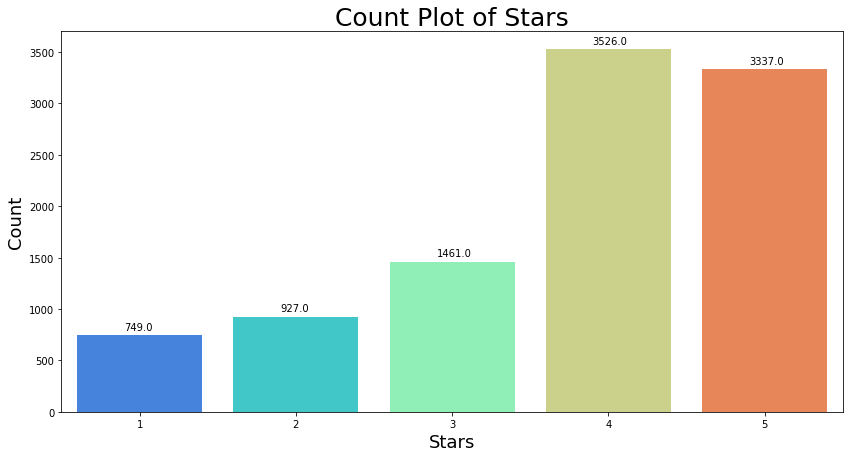

In [174]:
fig=plt.figure(figsize=(14,7))
ax=sns.countplot(x='stars', data=yelp, palette='rainbow')
plt.title('Count Plot of Stars', fontsize=25)
plt.xlabel('Stars', fontsize=18)
plt.ylabel('Count',fontsize=18)
for p in ax.patches:
        ax.annotate('{:0.1f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+50))

** Use groupby to get the mean values of the numerical columns, I should be able to create this dataframe with the operation:**

In [129]:
groupby_star= yelp.groupby('stars').mean()

In [130]:
groupby_star

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [131]:
groupby_star.corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


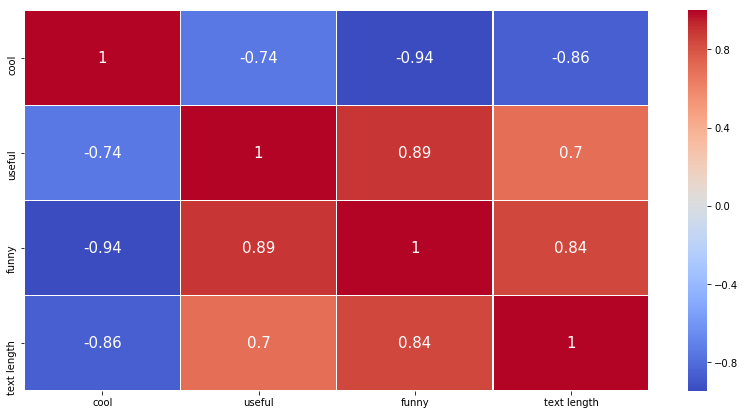

In [132]:
fig=plt.figure(figsize=(14,7))
ax=sns.heatmap(groupby_star.corr(), annot=True, linewidths=.5, cmap='coolwarm',annot_kws={"size":15})


In [133]:
# funny is highly correlated to useful and text length. Negative correlation between cool and (useful, funny)

## NLP Classification Task

Let's move on to the actual task. To make things a little easier, go ahead and only grab reviews that were either 1 star or 5 stars.

**Create a dataframe called yelp_class that contains the columns of yelp dataframe but for only the 1 or 5 star reviews.**

In [134]:
yelp_class= yelp[(yelp['stars']==1) | (yelp['stars']==5)]

In [135]:
yelp_class.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,1565


In [136]:
yelp_class.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4086 entries, 0 to 9999
Data columns (total 11 columns):
business_id    4086 non-null object
date           4086 non-null object
review_id      4086 non-null object
stars          4086 non-null int64
text           4086 non-null object
type           4086 non-null object
user_id        4086 non-null object
cool           4086 non-null int64
useful         4086 non-null int64
funny          4086 non-null int64
text length    4086 non-null int64
dtypes: int64(5), object(6)
memory usage: 383.1+ KB


** Create two objects X and y. X will be the 'text' column of yelp_class and y will be the 'stars' column of yelp_class. (Your features and target/labels)**

In [137]:
X= yelp_class['text']
y= yelp_class['stars']

In [139]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=101)

# Using Text Processing

** Import TfidfTransformer from sklearn. **

In [140]:
pipe = Pipeline([
    ('cv', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('model', MultinomialNB())
])

## Using the Pipeline

**Time to use the pipeline! Remember this pipeline has all your pre-process steps in it already, meaning we'll need to re-split the original data (Remember that we overwrote X as the CountVectorized version. What we need is just the text**

In [141]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('cv', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_a...ear_tf=False, use_idf=True)), ('model', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

### Predictions and Evaluation

** Now use the pipeline to predict from the X_test and create a classification report and confusion matrix. You should notice strange results.**

In [142]:
pipe_pred=pipe.predict(X_test)

In [143]:
print(confusion_matrix(y_test, pipe_pred))
print('\n')
print(classification_report(y_test, pipe_pred))

[[  0 228]
 [  0 998]]


             precision    recall  f1-score   support

          1       0.00      0.00      0.00       228
          5       0.81      1.00      0.90       998

avg / total       0.66      0.81      0.73      1226



/Users/jasonjklim/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [144]:
def text_process(mess):
    '''
    1. remove punc
    2. remove stop words
    3. return list of clean text words
    '''
    
    nopunc=[char for char in mess if char not in string.punctuation]
    
    nopunc=''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('English')]






In [145]:
pipe = Pipeline([
    ('cv', CountVectorizer(analyzer=text_process)),
    ('model', MultinomialNB())
])

In [146]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('cv', CountVectorizer(analyzer=<function text_process at 0x1289e78c8>, binary=False,
        decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,
        stop_words=None, strip_accents=None,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, vocabulary=None)), ('model', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [147]:
pipe_pred=pipe.predict(X_test)

In [148]:
print(confusion_matrix(y_test, pipe_pred))
print('\n')
print(classification_report(y_test, pipe_pred))

[[143  85]
 [ 11 987]]


             precision    recall  f1-score   support

          1       0.93      0.63      0.75       228
          5       0.92      0.99      0.95       998

avg / total       0.92      0.92      0.92      1226



In [48]:
pipe = Pipeline([
    ('cv', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('model', LogisticRegression())
])

In [49]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('cv', CountVectorizer(analyzer=<function text_process at 0x12438d598>, binary=False,
        decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,
...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [50]:
pipe_pred=pipe.predict(X_test)

In [51]:
print(confusion_matrix(y_test, pipe_pred))
print('\n')
print(classification_report(y_test, pipe_pred))

[[ 65 163]
 [  2 996]]


             precision    recall  f1-score   support

          1       0.97      0.29      0.44       228
          5       0.86      1.00      0.92       998

avg / total       0.88      0.87      0.83      1226



In [52]:
pipe = Pipeline([
    ('cv', CountVectorizer(analyzer=text_process)),
    ('model', MultinomialNB())
])

In [53]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('cv', CountVectorizer(analyzer=<function text_process at 0x12438d598>, binary=False,
        decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,
        stop_words=None, strip_accents=None,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, vocabulary=None)), ('model', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [54]:
pipe_pred=pipe.predict(X_test)
print(confusion_matrix(y_test, pipe_pred))
print('\n')
print(classification_report(y_test, pipe_pred))

[[143  85]
 [ 11 987]]


             precision    recall  f1-score   support

          1       0.93      0.63      0.75       228
          5       0.92      0.99      0.95       998

avg / total       0.92      0.92      0.92      1226



In [55]:
pipe = Pipeline([
    ('cv', CountVectorizer(analyzer=text_process)),
    ('model', LogisticRegression())
])

In [56]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('cv', CountVectorizer(analyzer=<function text_process at 0x12438d598>, binary=False,
        decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,
...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [57]:
pipe_pred=pipe.predict(X_test)
print(confusion_matrix(y_test, pipe_pred))
print('\n')
print(classification_report(y_test, pipe_pred))

[[155  73]
 [ 26 972]]


             precision    recall  f1-score   support

          1       0.86      0.68      0.76       228
          5       0.93      0.97      0.95       998

avg / total       0.92      0.92      0.92      1226



In [59]:
pipe = Pipeline([
    ('cv', CountVectorizer(analyzer=text_process)),
    ('model', DecisionTreeClassifier())
])

In [60]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('cv', CountVectorizer(analyzer=<function text_process at 0x12438d598>, binary=False,
        decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,
...      min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))])

In [61]:
pipe_pred=pipe.predict(X_test)
print(confusion_matrix(y_test, pipe_pred))
print('\n')
print(classification_report(y_test, pipe_pred))

[[117 111]
 [ 71 927]]


             precision    recall  f1-score   support

          1       0.62      0.51      0.56       228
          5       0.89      0.93      0.91       998

avg / total       0.84      0.85      0.85      1226



# Great Job!